# Clustering 

In [176]:
import pandas as pd
df = pd.read_csv('Dataset/processed_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1001 non-null   object 
 1   Gender                          1001 non-null   int64  
 2   Height                          1001 non-null   float64
 3   Weight                          1001 non-null   float64
 4   CALC                            1001 non-null   float64
 5   FAVC                            1001 non-null   int64  
 6   FCVC                            1001 non-null   float64
 7   NCP                             1001 non-null   float64
 8   SCC                             1001 non-null   int64  
 9   SMOKE                           1001 non-null   int64  
 10  CH2O                            1001 non-null   float64
 11  family_history_with_overweight  1001 non-null   int64  
 12  FAF                             10

In [177]:
df.describe()

,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.00000
mean,0.482517,0.475483,0.345843,0.715285,0.872128,2.444955,2.713523,0.053946,0.020979,1.964005,0.749251,1.066104,0.733654,1.141858,2.574426,1.89011
std,0.499944,0.178212,0.224226,0.509761,0.334114,0.542346,0.795994,0.226024,0.143386,0.622186,0.433661,0.853809,0.615200,0.419352,1.103044,0.65720
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.000000,0.339514,0.141936,0.000000,1.000000,2.000000,2.664800,0.000000,0.000000,1.482002,0.000000,0.201136,0.062167,1.000000,3.000000,1.00000
50%,0.000000,0.475590,0.321755,1.000000,1.000000,2.539150,3.000000,0.000000,0.000000,2.000000,1.000000,1.000000,0.766668,1.000000,3.000000,2.00000
75%,1.000000,0.600906,0.539712,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000,2.371015,1.000000,1.818052,1.000000,1.000000,3.000000,2.00000
max,1.000000,0.946245,1.000000,2.000000,1.000000,3.000000,4.000000,1.000000,1.000000,3.000000,1.000000,3.000000,2.000000,2.000000,4.000000,3.00000


In [178]:
processd_No_classLabel_data = df.drop(df.columns[-1] , axis=1)
processd_No_classLabel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             1001 non-null   object 
 1   Gender                          1001 non-null   int64  
 2   Height                          1001 non-null   float64
 3   Weight                          1001 non-null   float64
 4   CALC                            1001 non-null   float64
 5   FAVC                            1001 non-null   int64  
 6   FCVC                            1001 non-null   float64
 7   NCP                             1001 non-null   float64
 8   SCC                             1001 non-null   int64  
 9   SMOKE                           1001 non-null   int64  
 10  CH2O                            1001 non-null   float64
 11  family_history_with_overweight  1001 non-null   int64  
 12  FAF                             10

*clustering considered as an unsupervised learning , so first we should remove our class label from our dataset .*

### Encoding for Age column 

In [179]:
from sklearn.preprocessing import LabelEncoder

# encoding CAEC and CALC uniformly
encoding_mapping = {'10-15': 0, '16-20': 1, '21-25': 2 , '26-30' : 3 , '31+' : 4}

processd_No_classLabel_data.loc[:,'Age'] = processd_No_classLabel_data['Age'].map(encoding_mapping)

We have applied encoding for the Age column because previously in our Preprocessing step and after applying discretization we have made them into intervals which clustering algorithms will deal with as String which will cause an error for us 

In [180]:
processd_No_classLabel_data

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS
0,4,1,0.580136,0.665097,1.0,1,2.967300,3.0,0,0,2.530035,1,0.955317,1.339232,1.0,0
1,1,1,0.570708,0.500265,0.0,1,2.000000,3.0,0,0,2.000000,1,2.000000,0.000000,2.0,3
2,1,0,0.012072,0.135510,1.0,1,2.000000,3.0,1,0,1.040342,0,0.497373,1.783319,1.0,3
3,2,1,0.285354,0.090212,1.0,0,2.000000,3.0,0,0,1.000000,0,0.000000,0.000000,1.0,3
4,4,0,0.209260,0.073810,1.0,0,2.000000,3.0,0,0,2.000000,1,1.000000,0.000000,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,2,0,0.544484,0.763893,1.0,1,3.000000,3.0,0,0,1.657541,1,1.672639,0.629285,1.0,3
997,2,1,0.551684,0.446958,2.0,1,2.000000,3.0,0,1,1.000000,0,1.000000,1.000000,2.0,0
998,1,0,0.723026,0.037188,1.0,1,2.945967,3.0,0,0,2.953192,0,2.830911,1.466667,1.0,3
999,1,0,0.669598,0.812189,1.0,1,3.000000,3.0,0,0,2.691591,1,1.168368,0.735372,1.0,3


### number of clusters estimation using Silhouette Score

Text(0, 0.5, 'Silhouette Score')

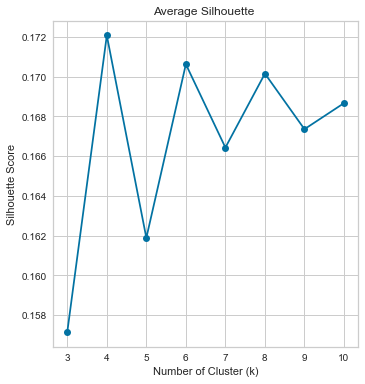

In [181]:
from sklearn.metrics import calinski_harabasz_score , silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_range = range( 3 , 11)
ch_scores = []
silhouette_scores = []

for k in k_range :
    kmeans = KMeans ( n_clusters = k , random_state= 45)
    kmeans.fit(processd_No_classLabel_data)
    ch_score = calinski_harabasz_score(processd_No_classLabel_data , kmeans.labels_)
    silhouette_avg = silhouette_score(processd_No_classLabel_data , kmeans.labels_)
    ch_scores.append(ch_score)
    silhouette_scores.append(silhouette_avg)
    
plt.figure(figsize=(12 , 6)) 

#plt.subplot(1 , 2 , 1)
#plt.plot( k_range , ch_scores , marker = "o")
#plt.title("Calinski-Harabasz index")
#plt.xlabel("Number of Cluster (k)")
#plt.ylabel("Calinski-Harabasz Score")

plt.subplot(1 , 2 , 2)
plt.plot( k_range , silhouette_scores , marker = "o")
plt.title("Average Silhouette ")
plt.xlabel("Number of Cluster (k)")
plt.ylabel("Silhouette Score")

we have decided to apply Silhouette Score to estimate number of clusters ( k ) for two reasons : 
- Effective with mixed densities 
- works for small to moderate data ( our dataset counted as small since we have around 1000 samples ) 

So by performing the Silhouette Score, we estimated the best numbers of clusters that we are going to apply and evaluate later by choosing the clusters that show the highest peeks which are 4 , 6 and 8 

#### Note
- Since our dataset values vary in a small range , we don't have to apply scaling since it's already scaled .

### Applaying clustering algorithm for our chosen K values 

#### when k = 4

In [182]:
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale 

np.random.seed(45)

kmeans4 = KMeans ( n_clusters = 4 ,random_state = 45)
kmeans_result4 = kmeans4.fit(processd_No_classLabel_data)

print("Cluster centers :")
print(kmeans_result4.cluster_centers_)

print("\nCluster Labels:")
print(kmeans_result4.labels_)

Cluster centers :
[[1.77575758 0.35151515 0.35739749 0.24601421 0.58787879 0.83030303
  2.40535218 1.20253551 0.05454545 0.01818182 1.90318922 0.55757576
  0.69177816 0.72987882 1.14545455 3.04242424]
 [2.60472973 0.48648649 0.49368699 0.46223512 0.83108108 0.91891892
  2.58633976 2.96372758 0.01689189 0.03040541 2.01211364 0.91554054
  0.62300072 0.5250373  1.09459459 3.02702703]
 [2.71710526 0.73026316 0.56874603 0.34836826 0.69736842 0.93421053
  2.43225601 2.97354407 0.01973684 0.02631579 1.9304801  0.84210526
  1.18427159 0.6745901  1.08552632 0.01315789]
 [1.39948454 0.43814433 0.47527541 0.29851321 0.68814433 0.82989691
  2.35890976 3.06333934 0.09536082 0.0128866  1.96629969 0.66752577
  1.51703411 0.91754945 1.19845361 3.03350515]]

Cluster Labels:
[2 3 3 ... 3 3 3]


#### when k = 6


In [183]:
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale 

np.random.seed(45)

kmeans6 = KMeans ( n_clusters = 6 ,random_state = 45)
kmeans_result6 = kmeans6.fit(processd_No_classLabel_data)

print("Cluster centers :")
print(kmeans_result6.cluster_centers_)

print("\nCluster Labels:")
print(kmeans_result6.labels_)

Cluster centers :
[[ 1.78125000e+00  3.37500000e-01  3.55439048e-01  2.44654343e-01
   5.81250000e-01  8.37500000e-01  2.41365488e+00  1.18536582e+00
   5.62500000e-02  1.87500000e-02  1.88914066e+00  5.50000000e-01
   6.89790950e-01  7.17384262e-01  1.15000000e+00  3.03750000e+00]
 [ 1.49805447e+00  4.82490272e-01  4.48108707e-01  2.57869541e-01
   6.77042802e-01  8.40466926e-01  2.25289537e+00  3.01520454e+00
   7.39299611e-02  7.78210117e-03  1.80343680e+00  6.92607004e-01
   5.85511089e-01  8.37171868e-01  1.21400778e+00  3.02334630e+00]
 [ 2.94148936e+00  4.46808511e-01  4.91310538e-01  5.44878590e-01
   8.93617021e-01  9.68085106e-01  2.72460552e+00  2.91119653e+00
   1.06382979e-02  3.19148936e-02  2.04738644e+00  9.62765957e-01
   6.82760330e-01  4.17760080e-01  1.01595745e+00  3.03191489e+00]
 [ 3.70930233e+00  6.86046512e-01  5.50867456e-01  4.61964548e-01
   8.48837209e-01  9.30232558e-01  2.47586778e+00  2.65384876e+00
   3.46944695e-17  2.32558140e-02  1.96189895e+00  9.06

#### when k = 8

In [184]:
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale 

np.random.seed(45)

kmeans8 = KMeans ( n_clusters = 8 ,random_state = 45)
kmeans_result8 = kmeans8.fit(processd_No_classLabel_data)

print("Cluster centers :")
print(kmeans_result8.cluster_centers_)

print("\nCluster Labels:")
print(kmeans_result8.labels_)

Cluster centers :
[[ 1.62886598e+00  4.84536082e-01  5.24585015e-01  3.98791657e-01
   6.75257732e-01  8.45360825e-01  2.53030424e+00  3.02277094e+00
   7.21649485e-02  2.57731959e-02  2.31031442e+00  8.40206186e-01
   2.07507862e+00  9.32899000e-01  1.14432990e+00  3.04639175e+00]
 [ 2.73333333e+00  7.50000000e-02  3.83431448e-01  4.92969313e-01
   9.16666667e-01  9.66666667e-01  2.92004692e+00  3.03374429e+00
   3.46944695e-17  1.66666667e-02  2.12588453e+00  9.16666667e-01
   1.98303067e-01  4.91209258e-01  1.13333333e+00  3.00000000e+00]
 [ 3.70930233e+00  6.86046512e-01  5.50867456e-01  4.61964548e-01
   8.48837209e-01  9.30232558e-01  2.47586778e+00  2.65384876e+00
   3.46944695e-17  2.32558140e-02  1.96189895e+00  9.06976744e-01
   9.18462558e-01  6.57202698e-01  1.03488372e+00 -4.44089210e-16]
 [ 1.66844920e+00  7.43315508e-01  5.19725947e-01  3.34703920e-01
   7.54010695e-01  8.66310160e-01  2.16440586e+00  2.90960344e+00
   2.13903743e-02  5.34759358e-03  2.08387621e+00  8.82

### Clustering Visualization 

%pip install yellowbrick 

*if the next cell didn't work or caused an error , run the line above*

C:\Users\rikhm\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\rikhm\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\rikhm\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Average Silhouette when K = 8')

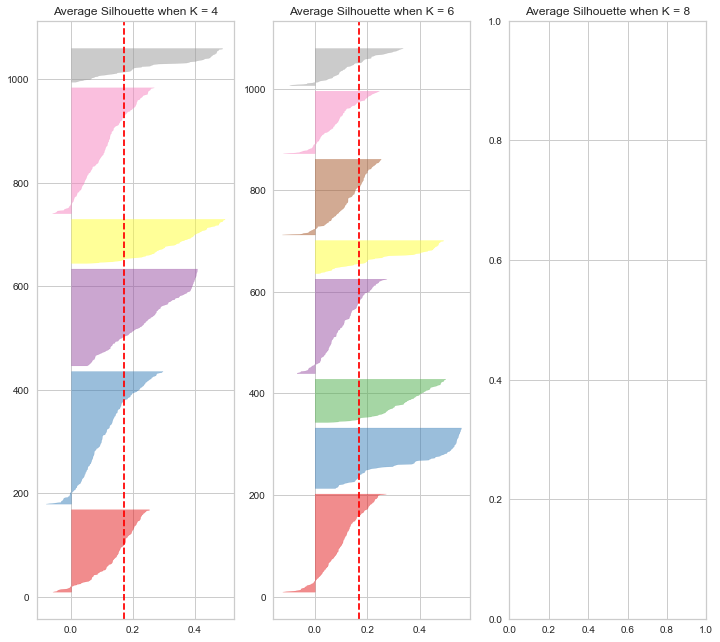

In [185]:
from yellowbrick.cluster import SilhouetteVisualizer
plt.figure(figsize=(12 , 11)) 

# k = 4
visualizer4 = SilhouetteVisualizer(kmeans4 , color="yellowbrick")
visualizer4.fit(processd_No_classLabel_data)
plt.subplot( 1 , 3 , 1)
plt.title("Average Silhouette when K = 4")
#print("The average silhouette score is : ", visualizer4.silhouette_score_)
#visualizer4.show()

# k = 6
visualizer6 = SilhouetteVisualizer(kmeans6 , color="yellowbrick")
visualizer6.fit(processd_No_classLabel_data)
plt.subplot( 1 , 3 , 2)
plt.title("Average Silhouette when K = 6")
#print("The average silhouette score is : ", visualizer6.silhouette_score_)
#visualizer6.show()

# k = 8
visualizer8 = SilhouetteVisualizer(kmeans8 , color="yellowbrick")
visualizer8.fit(processd_No_classLabel_data)
plt.subplot( 1 , 3 , 3)
plt.title("Average Silhouette when K = 8")
#print("The average silhouette score is : ", visualizer8.silhouette_score_)
#visualizer8.show()


%pip install kneed